In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [112]:
class State:
    def __init__(self, name: str, population: int, homicides: int) -> None:
        self.name = name
        self.population = population
        self.homicide = homicides
        self.hom_per_pop = homicides / population
        
    def __repr__(self) -> str:
        return f'{self.name}, population: {self.population}, homicides: {self.homicide}, h/p: {self.hom_per_pop:.6f}'
        
    def __str__(self) -> str:
        return f'{self.name}, population: {self.population}, homicides: {self.homicide}, h/p: {self.hom_per_pop}'

In [113]:
population_data = pd.read_excel("pop.xlsx")
gun_violence_data = pd.read_excel("gun_violence_data_2013_2018.xlsx")

print('Population per state \n', population_data.head())
print('Homicides per state \n', gun_violence_data.head())

Population per state 
           state  population
0    California    39237836
1         Texas    29527941
2       Florida    21781128
3      New York    19835913
4  Pennsylvania    12964056
Homicides per state 
             state  n_killed
0    Pennsylvania         0
1      California         1
2            Ohio         1
3        Colorado         4
4  North Carolina         2


In [114]:
def sum_column(excel: pd.DataFrame, state: str, column_name: str):
    filt = (excel['state'] == state) & (excel[column_name] != 0)
    return excel.loc[filt, column_name].sum()

In [115]:
# states = {}
# for state in gun_violence_data.state.unique():
#     states[state] = {}
#     states[state]['population'] = sum_column(excel = population_data, state = state, column_name = 'population')
#     states[state]['homicides'] = sum_column(excel = gun_violence_data, state = state, column_name = 'n_killed') 
#     states[state]['hom/pop'] = states[state]['homicides'] / states[state]['population']

In [122]:
states = []
for state in gun_violence_data.state.unique():
    population = sum_column(excel = population_data, state = state, column_name = 'population')
    homicides = sum_column(excel = gun_violence_data, state = state, column_name = 'n_killed')
    states.append(State(state, population, homicides))
print(states)

[Pennsylvania, population: 12964056, homicides: 2395, h/p: 0.000185, California, population: 39237836, homicides: 5562, h/p: 0.000142, Ohio, population: 11780017, homicides: 2508, h/p: 0.000213, Colorado, population: 5812069, homicides: 796, h/p: 0.000137, North Carolina, population: 10551162, homicides: 2225, h/p: 0.000211, Oklahoma, population: 3986639, homicides: 941, h/p: 0.000236, New Mexico, population: 2115877, homicides: 495, h/p: 0.000234, Louisiana, population: 4624047, homicides: 2179, h/p: 0.000471, Maryland, population: 6165129, homicides: 1691, h/p: 0.000274, Tennessee, population: 6975218, homicides: 1824, h/p: 0.000261, Missouri, population: 6168187, homicides: 2136, h/p: 0.000346, District of Columbia, population: 67005, homicides: 459, h/p: 0.006850, Illinois, population: 12671469, homicides: 3409, h/p: 0.000269, Delaware, population: 1003384, homicides: 217, h/p: 0.000216, Utah, population: 3322389, homicides: 282, h/p: 0.000085, Michigan, population: 10050811, homic

In [117]:
states.sort(key=lambda x: x.hom_per_pop, reverse=True)
hom_per_pop_numbers = []
hom_per_pop_names = []
for state in states:
    hom_per_pop_names.append(state.name)
    hom_per_pop_numbers.append(state.hom_per_pop)

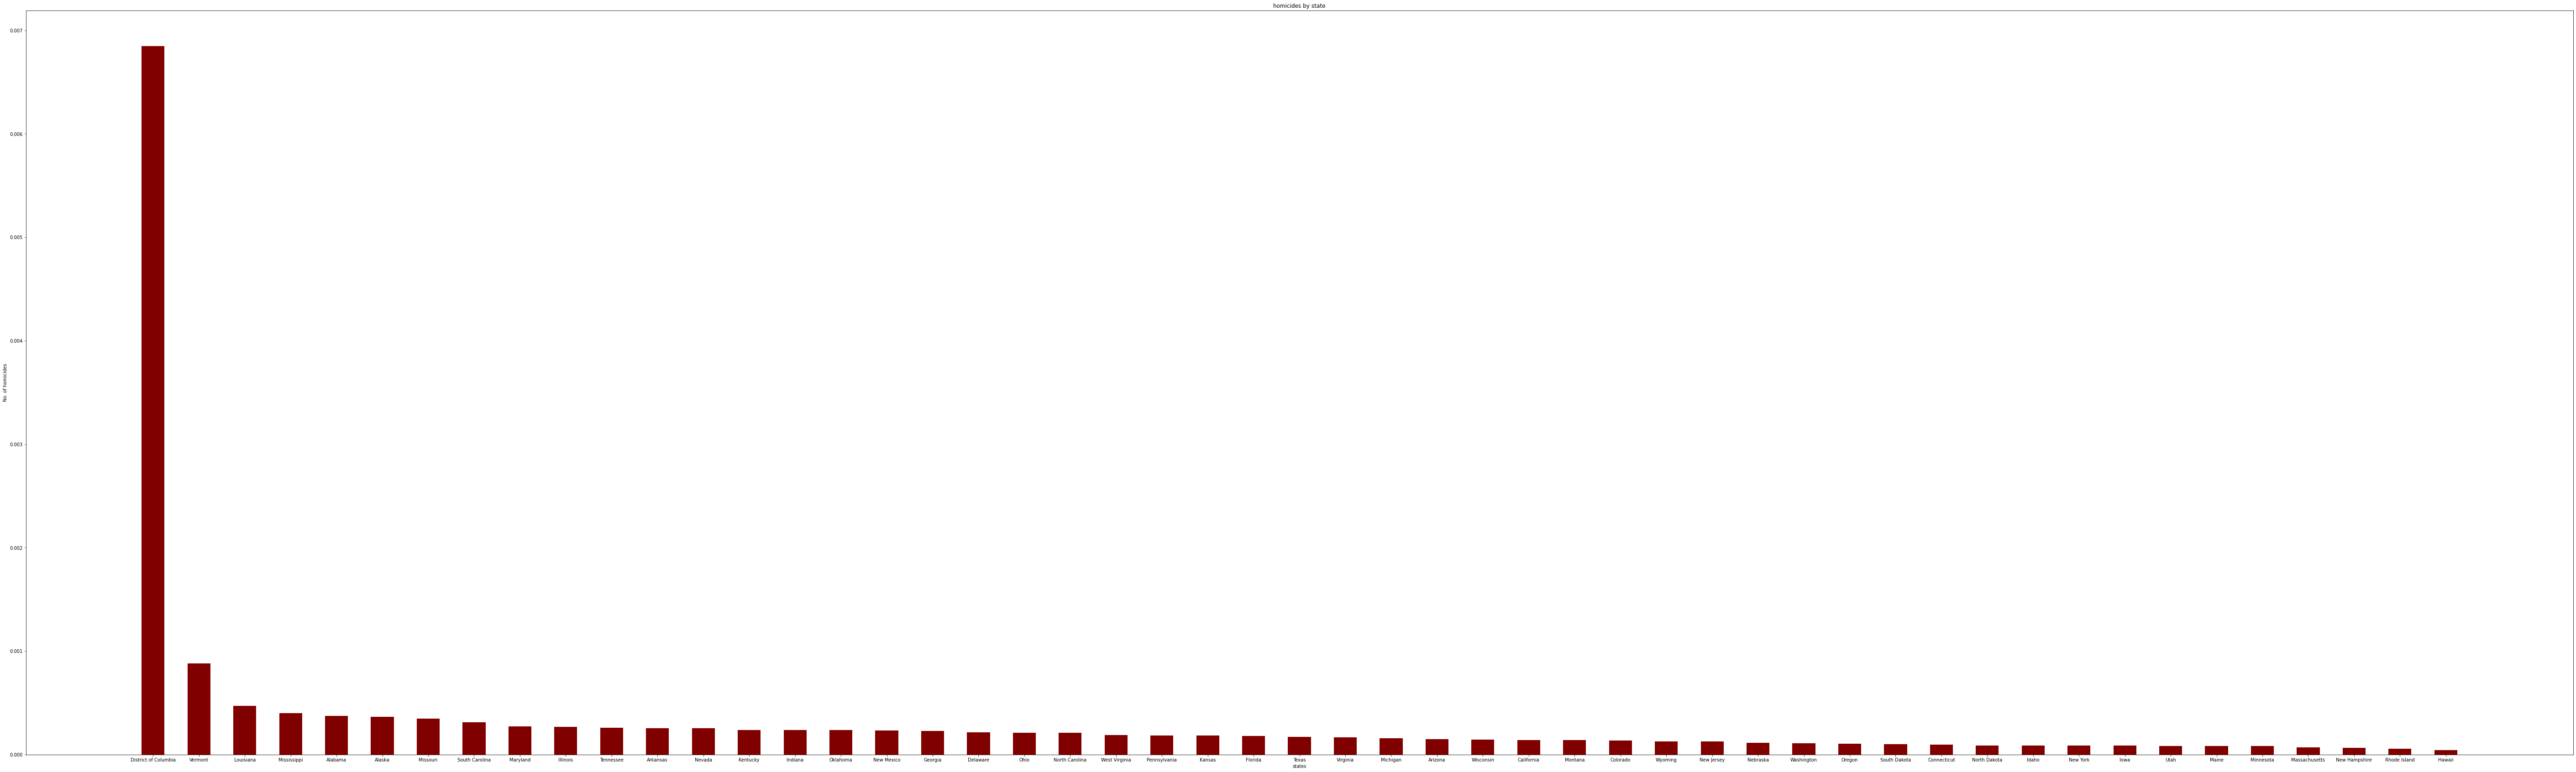

In [118]:
fig = plt.figure(figsize = (100, 30))  
plt.bar(hom_per_pop_names,  hom_per_pop_numbers, color ='maroon',
        width = 0.5)
plt.xlabel("states")
plt.ylabel("No. of homicides")
plt.title("homicides by state")
plt.show()


In [120]:
states.sort(key=lambda x: x.homicide, reverse=True)
hom_numbers = []
hom_names = []
for state in states:
    hom_names.append(state.name)
    hom_numbers.append(state.homicide)


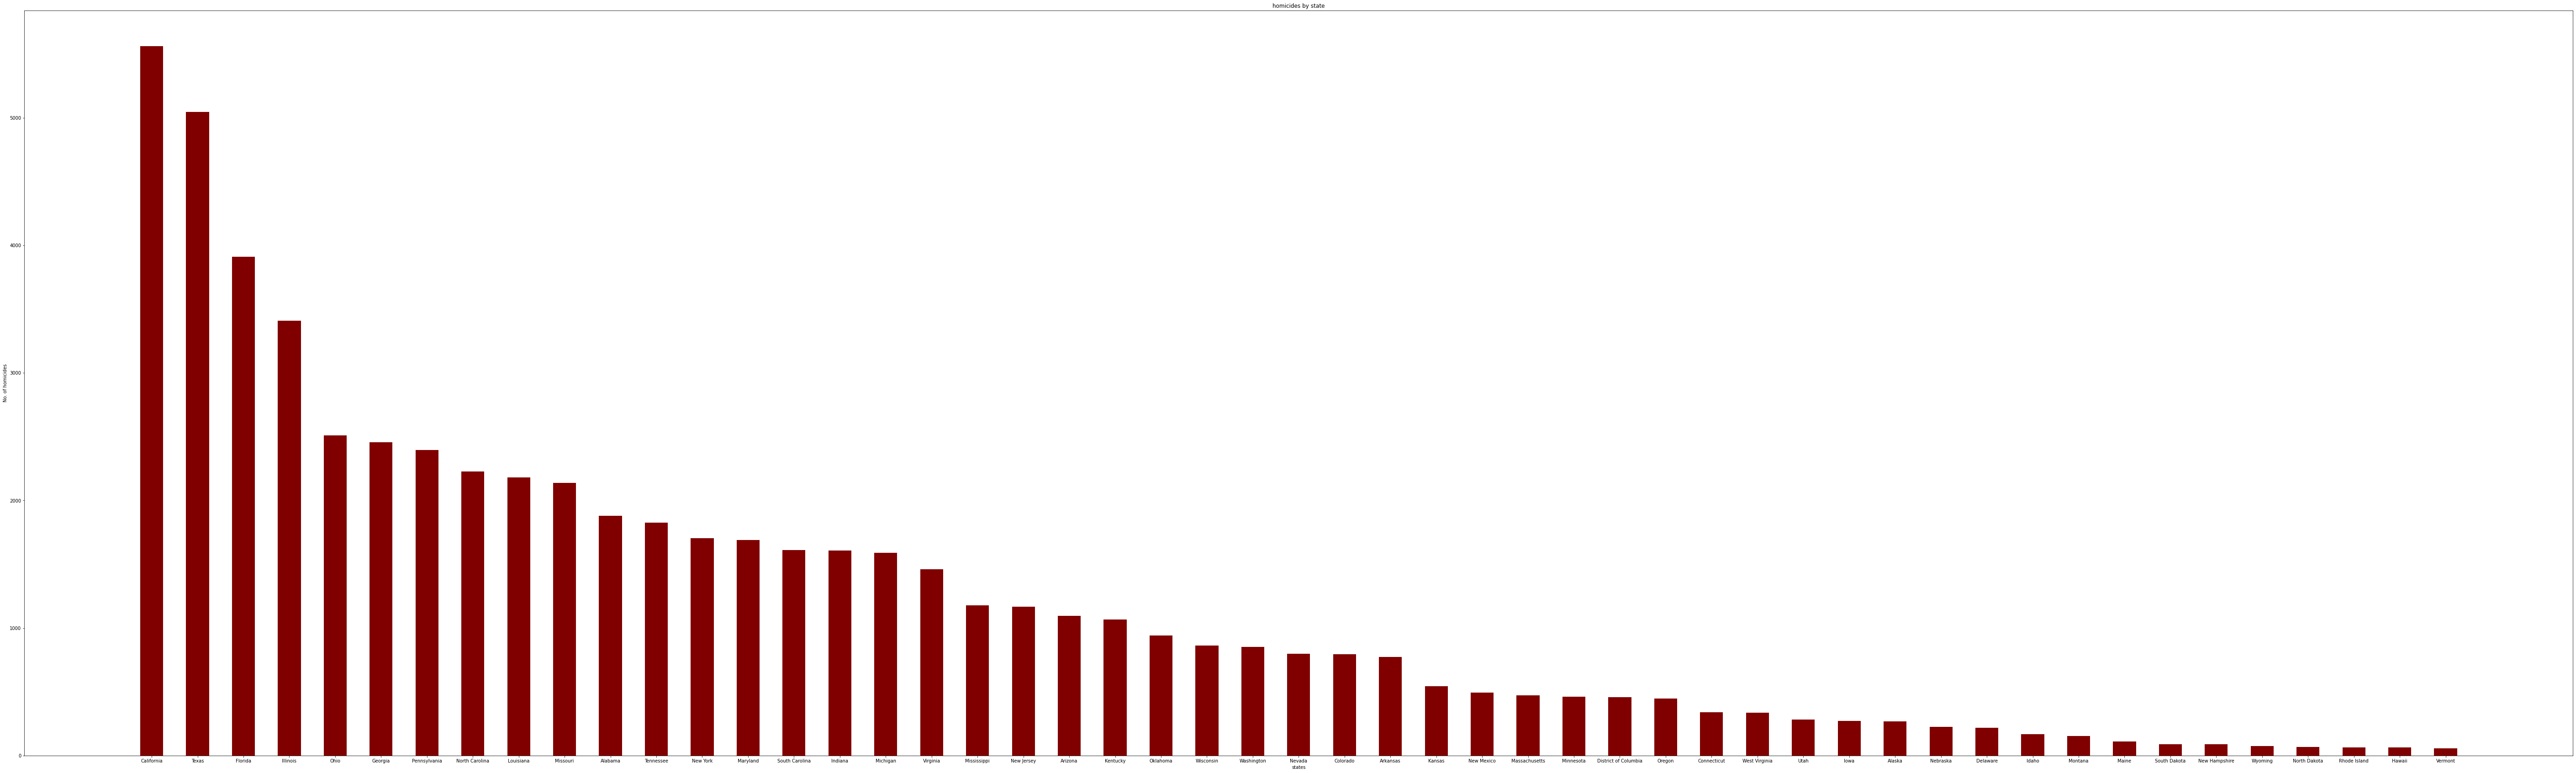

In [121]:

fig = plt.figure(figsize = (100, 30))  
plt.bar(hom_names,  hom_numbers, color ='maroon',
        width = 0.5)
plt.xlabel("states")
plt.ylabel("No. of homicides")
plt.title("homicides by state")
plt.show()
